# Symbolic verficiation for FR method

#### Part 1. Verify that 

\begin{align*}
0 & \geq\|\nabla f(x_{k})\|^{2}-\nu(\beta_{k-1},\gamma_{k-1},c_{k-1},\kappa)\|\nabla f(x_{k-1})\|^{2}\\
 & +\|\sqrt[4]{\frac{\beta_{k-1}}{(c_{k-1}-1)c_{k-1}^{3}}}d_{k-1}-\sqrt[4]{\frac{\beta_{k-1}c_{k-1}}{c_{k-1}-1}}\nabla f(x_{k-1})+\sqrt[4]{\frac{c_{k-1}-1}{\beta_{k-1}c_{k-1}}}\nabla f(x_{k})\|^{2}
\end{align*}

where 

$$\nu(\beta_{k-1},\gamma_{k-1},c_{k-1},\kappa)=2\sqrt{\frac{c_{k-1}-1}{c_{k-1}}}\sqrt{\beta_{k-1}}-c_{k-1}\gamma_{k-1}^{2}\mu L+\gamma_{k-1}(\mu+L)-1.$$

In [360]:
(*Clear memory and all the variables*)
ClearAll["Global`*"];
Remove["Global`*"];
SetOptions[EvaluationNotebook[], 
  CellEpilog :> SelectionMove[EvaluationNotebook[], Next, Cell]];
SetOptions[$FrontEnd, "FileChangeProtection" -> None];
(*You may get the warning:
"Remove::rmnsm: There are no symbols matching "Global`*"."
if you run this block twice,
but that is fine
*)

In [366]:
(* For notational convenience, in the code we let c[k-1] ≜ c, β[k-1] ≜ β, γ[k-1] ≜ γ*)

(* System of NCGM *)
(* ============== *)

d[k] = g[k] + β d[k - 1];

x[k] = x[k - 1] - γ d[k - 1];

(* Constraints in consideration *)
(* ============================ *)

constraint1 = g[k - 1] d[k - 1] - g[k - 1]^2 (* == 0*);

constraint2 = g[k] d[k - 1] (* == 0*);

constraint3 = g[k]^2 - β g[k - 1]^2 (* == 0*);

constraint4 = d[k - 1]^2 - c g[k - 1]^2 (* == 0*);

constraint5 = 
  f[k] - f[k - 1] + γ g[k] d[k - 1] + (g[k - 1] - g[k])^2/(
   2 L) + (μ (γ d[k - 1] - (g[k - 1] - g[k])/L)^2)/(
   2 (1 - μ/L)) (* <= 0*);
   
constraint6 = 
  f[k - 1] - f[k] - γ g[k - 1] d[k - 1] + (g[k - 1] - g[k])^2/(
   2 L) + (μ (γ d[k - 1] - (g[k - 1] - g[k])/L)^2)/(
   2 (1 - μ/L)) (* <= 0*);
   
(* Weight λ"i" for constraint"i" *)   
(* ============================ *)
   
λ1 = -((2 Sqrt[β])/(Sqrt[-1 + c] Sqrt[c])) + γ (L + μ);
    
λ2 = -γ (L + μ) + 2/c;

λ3 = Sqrt[c - 1]/(Sqrt[β] Sqrt[c]);

λ4 = 
  Sqrt[β]/(c (Sqrt[-1 + c] Sqrt[c])) - L γ^2 μ;
  
λ5 = L - μ;

λ6 = L - μ;


2                                                                   2
Sqrt[β] d[-1 + k]    2 Sqrt[β] d[-1 + k] g[-1 + k]            2   2 Sqrt[β] g[-1 + k]
------------------ - ----------------------------- + g[-1 + k]  + -------------------- - 
              3/2        Sqrt[-1 + c] Sqrt[c]                     Sqrt[-1 + c] Sqrt[c]
Sqrt[-1 + c] c
 
                             2
    Sqrt[c] Sqrt[β] g[-1 + k]                 2                2        2            2
>   -------------------------- - L γ g[-1 + k]  - γ μ g[-1 + k]  + c L γ  μ g[-1 + k]  + 
           Sqrt[-1 + c]
 
                                                                 2
    2 d[-1 + k] g[k]                          2              g[k]
>   ---------------- - 2 g[-1 + k] g[k] + g[k]  - ---------------------------- + 
           c                                      Sqrt[-1 + c] Sqrt[c] Sqrt[β]
 
                   2
       Sqrt[c] g[k]
>   --------------------
    Sqrt[-1 + c] Sqrt[β]
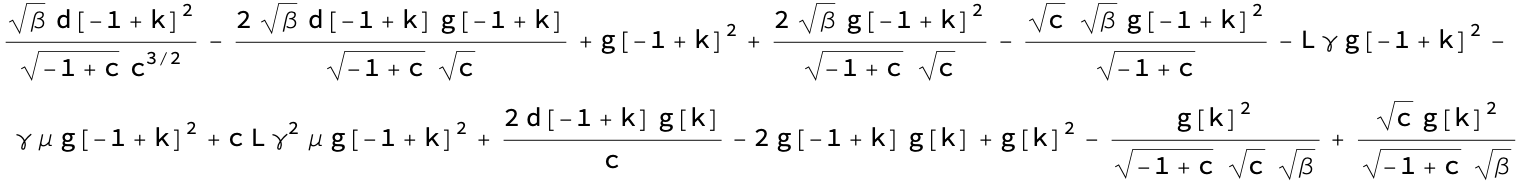

In [426]:
WeightedSum = ((λ1*constraint1) + (λ2*
       constraint2) + (λ3*constraint3) + (λ4*
       constraint4) + (λ5*constraint5) + (λ6*
       constraint6) // FullSimplify //Expand)

β                2           β      1/4   c β   1/4
Sqrt[-----------] d[-1 + k]  - 2 (-----------)    (------)    d[-1 + k] g[-1 + k] + 
               3                            3      -1 + c
     (-1 + c) c                   (-1 + c) c
 
             2          (-1 + c) β           2         c β             2
>   g[-1 + k]  - 2 Sqrt[----------] g[-1 + k]  + Sqrt[------] g[-1 + k]  - 
                            c                         -1 + c
 
                 2                2        2            2
>   L γ g[-1 + k]  - γ μ g[-1 + k]  + c L γ  μ g[-1 + k]  + 
 
            β      1/4   c β   3/4
    2 (-----------)    (------)    d[-1 + k] g[k]
                 3      -1 + c
       (-1 + c) c
>   --------------------------------------------- - 
                          β
 
            β      1/4   c β   3/4
    2 (-----------)    (------)    d[-1 + k] g[k]
                 3      -1 + c
       (-1 + c) c                                                          2
>   --------------------------------------------- - 2 g[-1 + k] g[k] + g[k]  + 
                         c β
 
          c β        2         c β        2
    Sqrt[------] g[k]    Sqrt[------] g[k]
         -1 + c               -1 + c
>   ------------------ - ------------------
            β                   c β
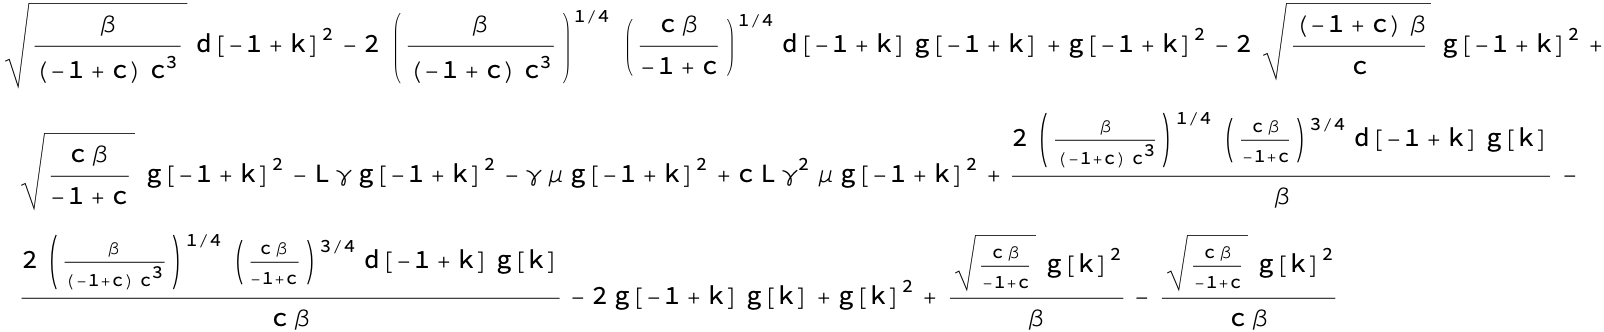

In [427]:
ν = (2 Sqrt[c - 1] Sqrt[β])/Sqrt[
   c] + (-c L γ^2 μ + γ (L + μ) - 1);
   
a2 = -((c β)/(-1 + c))^(1/4); 

a3 = 1/((c β)/(-1 + c))^(
 1/4); 
 
a4 = (β/((-1 + c) c^3))^(1/4);

positiveTerm1 = (a4 d[k - 1] + a2 g[k - 1] + a3 g[k])^2;

restTerm2 = -ν g[k - 1]^2 + g[k]^2;

SimplifiedTerm = 
 Assuming[β > 0 && c > 1, 
   Simplify[(positiveTerm1 + restTerm2)]]//Expand

In [436]:
(* See if both term matches *)
TermDiff = Assuming[β > 0 && c > 1 , 
 FullSimplify[WeightedSum - SimplifiedTerm]]

0

#### Part 2: Showing that $\|d_k\|^2 \leq (1+ c_{k-1} \beta_{k-1}) \|\nabla f(x_k)\|^2$

In [328]:
(*Clear memory and all the variables*)
ClearAll["Global`*"];
Remove["Global`*"];
SetOptions[EvaluationNotebook[], 
  CellEpilog :> SelectionMove[EvaluationNotebook[], Next, Cell]];
SetOptions[$FrontEnd, "FileChangeProtection" -> None];
(*You may get the warning:
"Remove::rmnsm: There are no symbols matching "Global`*"."
if you run this block twice,
but that is fine
*)

In [334]:
(* For notational convenience, in the code we let c[k-1] ≜ c, β[k-1] ≜ β, γ[k-1] ≜ γ*)

(* System of NCGM *)
(* ============== *)

d[k] = g[k] + β d[k - 1];

x[k] = x[k - 1] - γ d[k - 1];

(* Constraints in consideration *)
(* ============================ *)

constraint1 = g[k] d[k - 1] (* == 0*);

constraint2 = d[k - 1]^2 - c g[k - 1]^2 (* == 0*);

constraint3 = g[k]^2 - β g[k - 1]^2 (* == 0*);

   
(* Weight λ"i" for constraint"i" *)   
(* ============================= *)
   
λ1 = 2 β;
    
λ2 = β^2;

λ3 = -c β;

2                            2
β (β d[-1 + k]  + 2 d[-1 + k] g[k] - c g[k] )
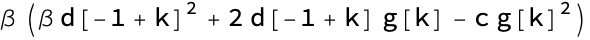

In [352]:
WeightedSum = ( (λ1*constraint1) + (λ2*constraint2) + (λ3*constraint3)) // FullSimplify

2                        2
-((1 + c β) g[k] ) + (β d[-1 + k] + g[k])
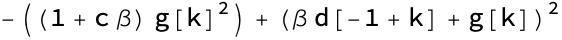

In [353]:
SimplifiedTerm = 
 Assuming[β > 0 && c > 1, d[k]^2 - (1+c β) g[k]^2] 

In [357]:
(* See if both term matches *)

TermDiff = Assuming[β > 0 && c > 1 , 
 FullSimplify[WeightedSum - SimplifiedTerm]]

0

#### Part 3: Verify if

$$
\left(\sqrt{\frac{c_{k-1}-1}{c_{k-1}}}+\sqrt{\frac{(\mu+L)^{2}}{4c_{k-1}\mu L}-\frac{1}{c_{k-1}}}\right)^{2}
 =1+\frac{(L-\mu)}{c_{k-1}}\sqrt{\frac{(c_{k-1}-1)}{\mu L}}+\frac{\mu^{2}-6\mu L+L^{2}}{4c_{k-1}\mu L},
$$ 


In [451]:
(*Clear memory and all the variables*)
ClearAll["Global`*"];
Remove["Global`*"];
SetOptions[EvaluationNotebook[], 
  CellEpilog :> SelectionMove[EvaluationNotebook[], Next, Cell]];
SetOptions[$FrontEnd, "FileChangeProtection" -> None];
(*You may get the warning:
"Remove::rmnsm: There are no symbols matching "Global`*"."
if you run this block twice,
but that is fine
*)

In [457]:
βMax1 = 
  1 + ((L - μ) Sqrt[(-1 + c)/(L μ)])/c + (
   L^2 - 6 L μ + μ^2)/(4 c L μ);
   
βMax2 = (Sqrt[c - 1]/Sqrt[c] + 
    Sqrt[(μ + L)^2/(4 c μ L) - 1/c])^2;
    
Assuming[c > 1 && μ > 0 && μ < L, 
 Simplify[βMax1 - βMax2]]

0

#### Part 4: Verify if 

$$
1+\frac{(L-\mu)}{c_{k-1}}\sqrt{\frac{(c_{k-1}-1)}{\mu L}}+\frac{\mu^{2}-6\mu L+L^{2}}{4c_{k-1}\mu L}=\frac{1}{c_{k-1}}\frac{\left(1-q+2\sqrt{(c_{k-1}-1)q}\right)^{2}}{4q}
$$

In [35]:
(*Clear memory and all the variables*)
ClearAll["Global`*"];
Remove["Global`*"];
SetOptions[EvaluationNotebook[], 
  CellEpilog :> SelectionMove[EvaluationNotebook[], Next, Cell]];
SetOptions[$FrontEnd, "FileChangeProtection" -> None];
(*You may get the warning:
"Remove::rmnsm: There are no symbols matching "Global`*"."
if you run this block twice,
but that is fine
*)

In [41]:
ν1 = ((((1 - q + 2 Sqrt[(c - 1) q])^2/(4 q)))/c) /. {q -> μ/L};
ν2 = 
   (1 + ((L - μ) Sqrt[(-1 + c)/(L μ)])/c + (
      L^2 - 6 L μ + μ^2)/(4 c L μ));
Assuming[c > 1 && μ > 0 && μ < L, Simplify[ν1 - ν2]]

0

#### Part 5: Verify if 

$$\left(1+\frac{\left(1-q +2\sqrt{(c_{k-1}-1) q}\right)^{2}}{4q }\right)= 1 + c_{k-1} \left( \beta_\textrm{max}\right),$$ 

where 

$$ \beta_\textrm{max} = 1+\frac{(L-\mu)}{c_{k-1}}\sqrt{\frac{(c_{k-1}-1)}{\mu L}}+\frac{\mu^{2}-6\mu L+L^{2}}{4c_{k-1}\mu L}.$$

In [22]:
(*Clear memory and all the variables*)
ClearAll["Global`*"];
Remove["Global`*"];
SetOptions[EvaluationNotebook[], 
  CellEpilog :> SelectionMove[EvaluationNotebook[], Next, Cell]];
SetOptions[$FrontEnd, "FileChangeProtection" -> None];
(*You may get the warning:
"Remove::rmnsm: There are no symbols matching "Global`*"."
if you run this block twice,
but that is fine
*)

In [28]:
ν1 = (1 + (1 - q + 2 Sqrt[(c - 1) q])^2/(4 q)) /. {q -> μ/L};
ν2 = 
  1 + c (1 + ((L - μ) Sqrt[(-1 + c)/(L μ)])/c + (
      L^2 - 6 L μ + μ^2)/(4 c L μ));
Assuming[c > 1 && μ > 0 && μ < L, Simplify[ν1 - ν2]]

0